# import pandamonium's Data Science Team Project


## Background:
Breast cancer is one of the most common types of cancer in the UK. According to the NHS, about 1 in 8 women are diagnosed with breast cancer during their lifetime and early detection will significantly increase the chance of recovery. 

Breast cancer occurs due to abnormal growth of cells in breast tissue, known as a tumour. Presence of tumours do not necessarily mean cancer, some tumours are benign (non-cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Doctors commonly perform ultrasounds, mammograms and biopsies in order to diagnose breast cancer.

We have been tasked to improve the early detection of breast cancer using machine learning techniques. We have trained several machine learning models to predict whether a tumour is benign or malignant using the Breast Cancer Wisconsin (Diagnostic) Data Set. The features we have used in training are computed from a digitised image of breast mass from different patients, there are 10 features computed from each of the cells in the sample, which have the mean value, standard error (SE) and extreme value (worst) calculated on them, resulting in 30 different features which we chose from to train our model.

The goal of this project is to train a machine learning model which predicts whether the cancer is **benign or malignant**. We have chosen 1 model to put forward to you in the hopes that it will help in your quest to improve early detection, and thus save lives.

## Contents:
1. **Loading and Pre-Processing the Data**
  
    1.1 Importing Relevant Libraries
  
    1.2 Loading and Exploring the Raw Dataframe
  
    1.3 Pre-Processing the Data


2. **Data Exploration**

    2.1 Missing values
    
    2.2 Duplicate Rows
    
    2.3 Data Split between Diagnoses
    
    2.4 Outliers


3. **Data Visualisation**

    3.1 Graph Types
    
    3.2 Correlations
    
    3.3 Scatter Plots
        
    
4. **Preparing Data for Machine Learning Algorithms**

    4.1 Feature Selection
    
    4.2 Feature Scaling
    
    4.3 Splitting Data into 'Training' and 'Testing' Groups and Determining the Threshold
        
    
5. **Machine Learning Models**

    5.1 Logistic Regression
  
    5.2 Decision Tree Algorithm
  
    5.3 Random Forest Classification

    5.4 Nearest Neighbour

    5.5 Support Vector Machines

    5.6 Kernel SVM

    5.7 Naive Bayes


6. **Evaluation**

## 1. Loading and Pre-Processing the Data
### 1.1 Importing Relevant Libraries:

In [3]:
#### Core Python Libraries ####
import pandas as pd
import numpy as np

import pickle
import os
from IPython.display import Math
from itertools import product

#Profile Report
from pandas_profiling import ProfileReport

##### Data Visualisation Libraries ####
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Machine Learning Models ####
#Standard Tools:
from sklearn.datasets import load_iris
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, roc_curve, auc
import scipy.optimize as op 

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

#Logistic Regression:
from sklearn.linear_model import LogisticRegression

#Dummy Classifier:
from sklearn.dummy import DummyClassifier

#Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier

#Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier

#K Nearest Neighbour:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Support Vector Machine/Kernel SVM:
from sklearn.svm import SVC

# Naive Bayes Classifier:
from sklearn.naive_bayes import GaussianNB

### Yellow Brick Analysis
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold

### 1.2 Loading and Exploring the Raw Dataframe

In [5]:
df_raw = pd.read_csv(r"data.csv", encoding = "UTF-8", index_col=[0]) #gets rid of index column

#### Question: How many rows of data are there? How many columns/features are there?

In [41]:
df_raw.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
print(df_raw)

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          s

In [5]:
df_raw.describe(include='all')

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count        569   569.000000    569.000000      569.000000   569.000000   
unique         2          NaN           NaN             NaN          NaN   
top            B          NaN           NaN             NaN          NaN   
freq         357          NaN           NaN             NaN          NaN   
mean         NaN    14.127292     19.289649       91.969033   654.889104   
std          NaN     3.524049      4.301036       24.298981   351.914129   
min          NaN     6.981000      9.710000       43.790000   143.500000   
25%          NaN    11.700000     16.170000       75.170000   420.300000   
50%          NaN    13.370000     18.840000       86.240000   551.100000   
75%          NaN    15.780000     21.800000      104.100000   782.700000   
max          NaN    28.110000     39.280000      188.500000  2501.000000   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000        569.000000      569.000000   
unique              NaN               NaN             NaN   
top                 NaN               NaN             NaN   
freq                NaN               NaN             NaN   
mean           0.096360          0.104341        0.088799   
std            0.014064          0.052813        0.079720   
min            0.052630          0.019380        0.000000   
25%            0.086370          0.064920        0.029560   
50%            0.095870          0.092630        0.061540   
75%            0.105300          0.130400        0.130700   
max            0.163400          0.345400        0.426800   

        concave points_mean  symmetry_mean  ...  texture_worst  \
count            569.000000     569.000000  ...     569.000000   
unique                  NaN            NaN  ...            NaN   
top                     NaN            NaN  ...            NaN   
freq                    NaN            NaN  ...            NaN   
mean               0.048919       0.181162  ...      25.677223   
std                0.038803       0.027414  ...       6.146258   
min                0.000000       0.106000  ...      12.020000   
25%                0.020310       0.161900  ...      21.080000   
50%                0.033500       0.179200  ...      25.410000   
75%                0.074000       0.195700  ...      29.720000   
max                0.201200       0.304000  ...      49.540000   

        perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count        569.000000   569.000000        569.000000         569.000000   
unique              NaN          NaN               NaN                NaN   
top                 NaN          NaN               NaN                NaN   
freq                NaN          NaN               NaN                NaN   
mean         107.261213   880.583128          0.132369           0.254265   
std           33.602542   569.356993          0.022832           0.157336   
min           50.410000   185.200000          0.071170           0.027290   
25%           84.110000   515.300000          0.116600           0.147200   
50%           97.660000   686.500000          0.131300           0.211900   
75%          125.400000  1084.000000          0.146000           0.339100   
max          251.200000  4254.000000          0.222600           1.058000   

        concavity_worst  concave points_worst  symmetry_worst  \
count        569.000000            569.000000      569.000000   
unique              NaN                   NaN             NaN   
top                 NaN                   NaN             NaN   
freq                NaN                   NaN             NaN   
mean           0.272188              0.114606        0.290076   
std            0.208624              0.065732        0.061867   
min            0.000000              0.000000        0.156500   
25%            0.114500              0.064930        0.250400   
50%            0.226700              0.099930        0.282

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [44]:
df_raw.isnull()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302        False        False         False           False      False   
842517        False        False         False           False      False   
84300903      False        False         False           False      False   
84348301      False        False         False           False      False   
84358402      False        False         False           False      False   
...             ...          ...           ...             ...        ...   
926424        False        False         False           False      False   
926682        False        False         False           False      False   
926954        False        False         False           False      False   
927241        False        False         False           False      False   
92751         False        False         False           False      False   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302              False             False           False   
842517              False             False           False   
84300903            False             False           False   
84348301            False             False           False   
84358402            False             False           False   
...                   ...               ...             ...   
926424              False             False           False   
926682              False             False           False   
926954              False             False           False   
927241              False             False           False   
92751               False             False           False   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                  False          False  ...          False   
842517                  False          False  ...          False   
84300903                False          False  ...          False   
84348301                False          False  ...          False   
84358402                False          False  ...          False   
...                       ...            ...  ...            ...   
926424                  False          False  ...          False   
926682                  False          False  ...          False   
926954                  False          False  ...          False   
927241                  False          False  ...          False   
92751                   False          False  ...          False   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302              False       False             False              False   
842517              False       False             False              False   
84300903            False       False             False              False   
84348301            False       False             False              False   
84358402            False       False             False              False   
...                   ...         ...               ...                ...   
926424              False       False             False              False   
926682              False       False             False              False   
926954              False       False             False              False   
927241              False       False             False              False   
92751               False       False             False              False   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302              False                 False           False   
842517              False                 False           False   
84300903            

In [7]:
df_raw.shape

(569, 32)

In [6]:
profile = ProfileReport(df_raw, title='Pandas Profiling Report')

In [7]:
profile.to_widgets()

### Summary: 

* There are 569 rows of data and 32 columns. 
* There are 10 features that have been computed:
 1. radius
 2. texture
 3. perimeter
 4. area
 5. smoothness
 6. compactness
 7. concavity
 8. concave points
 9. symmetry
 10. fractal dimension


* These features have the mean, standard error (SE) and worst calculated from them, resulting in 30 features
* Output is stored in the 'diagnosis' column, marked as 'M' for malignant or 'B' for benign.
* All columns are data type float64 with the exception of 'diagnosis' which is an object.
* The column 'Unnamed: 32' contains 0 non-null values and appears to be an empty column.

### 1.3 Pre-Processing the Data
There is a column which only has null values (Unnamed: 32), we should get rid of this now as it will interfere with our models and calculations later on:

In [8]:
df_clean = df_raw.drop(['Unnamed: 32'], axis=1)

#### Checking the column has been removed:

In [9]:
df_clean.shape

(569, 31)

#### Dealing with Categorical Data:

We have a categorical attribute (diagnosis), most models cannot handle these (object) values -- so we need to transform them if we want to include them in our model before modelling.

We will be using One-hot Encoding which converts each categorical value into a new column and assigns a 1 or 0 (True/False) value to each row
#### Most models cannot use categorical/object values (i.e. the 'diagnosis' column)- these must be transformed to a different data type using one-hot encoding

In [10]:
one_hot_df = pd.get_dummies(df_clean, drop_first=True) #B = 0, M = 1

In [11]:
one_hot_df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
id                                                                    ...   
842302                0.14710         0.2419                 0.07871  ...   
842517                0.07017         0.1812                 0.05667  ...   
84300903              0.12790         0.2069                 0.05999  ...   
84348301              0.10520         0.2597                 0.09744  ...   
84358402              0.10430         0.1809                 0.05883  ...   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  diagnosis_M  
id                                                              
842302            0.4601                  0.11890            1  
842517            0.2750                  0.08902            1  
84300903          0.3613                  0.08758            1  
84348301          0.6638                  0.17300            1  
84358402          0.2364                  0.07678            1  

[5 rows x 31 columns]

## 2. Data Exploration

### 2.1 Missing values 

#### Are there any null/missing values in the columns?

In [53]:
df_clean.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [54]:
df_clean.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no missing/null values in the columns

### 2.2 Duplicate Rows
#### Are there any duplicate rows?

In [13]:
df_raw.drop_duplicates()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   
...                       ...            ...  ...            ...   
926424                0.13890         0.1726  ...          26.40   
926682                0.09791         0.1752  ...          38.25   
926954                0.05302         0.1590  ...          34.12   
927241                0.15200         0.2397  ...          39.42   
92751                 0.00000         0.1587  ...          30.37   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0           0.16220            0.66560   
842517             158.80      1956.0           0.12380            0.18660   
84300903           152.50      1709.0           0.14440            0.42450   
84348301            98.87       567.7           0.20980            0.86630   
84358402           152.20      1575.0           0.13740            0.20500   
...                   ...         ...               ...                ...   
926424             166.10      2027.0           0.14100            0.21130   
926682             155.00      1731.0           0.11660            0.19220   
926954             126.70      1124.0           0.11390            0.30940   
927241             184.60      1821.0           0.16500            0.86810   
92751               59.16       268.6           0.08996            0.06444   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504       

Since all 569 rows of data were still returned after running 'drop duplicates', that means that there are no duplicate rows of data.

### 2.3 Data Split between Diagnoses
#### Question: What is the split between data marked as malignant ('M') and benign ('B')?

In [12]:
malignant_count = len(df_raw[df_raw['diagnosis'] == 'M'])
benign_count = len(df_raw[df_raw['diagnosis'] == 'B'])

print('The number of malignant cases is ' + str(malignant_count) + '. The number of benign cases is ' + str(benign_count))

The number of malignant cases is 212. The number of benign cases is 357


Text(0, 0.5, 'Frequency')

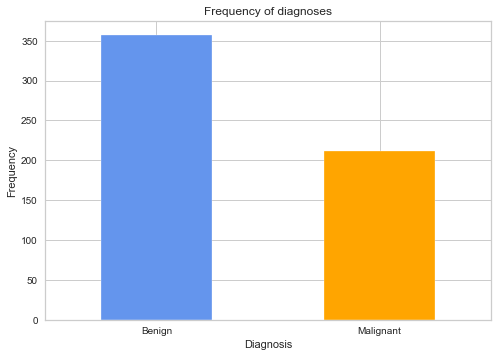

In [13]:
#Plotting frequency of benign and malignant tumours:
Labels = ['Benign', 'Malignant']
diagnoses = pd.value_counts(df_clean['diagnosis'], sort = True)
diagnoses.plot(kind = 'bar', rot=0, color=["cornflowerblue", "orange"])
plt.title("Frequency of diagnoses")
plt.xticks(range(2), Labels)
plt.xlabel("Diagnosis")
plt.ylabel("Frequency")

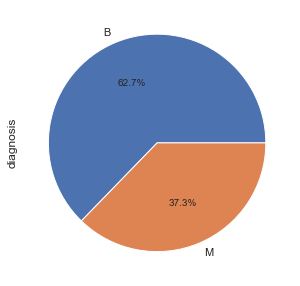

In [30]:
pie_plot = df_clean['diagnosis'].value_counts().plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%')

### Summary

* There are 569 records, each with 11 columns.
* Diagnosis is the only categorical variable (containing objects), all other variables are continuous.
* There are no missing or duplicate values in any of the attributes
* Class distribution is: **357 benign and 212 malignant**
* 37.3% of the data is classified as malignant, 62.7% of the data is classified as benign; there is a slight skew to the data, however not to a significant amount (so there is no need for us to rebalance the training set when we get to training our model).
* This means our chosen model has to beat 62.7% accuracy to be better at classifying than random chance

### 2.4 Outliers

We can check for outliers using box plots and seeing if there are any values above 1.5*interquartile range (IQR).

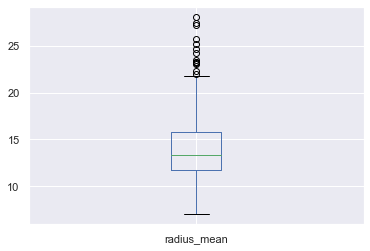

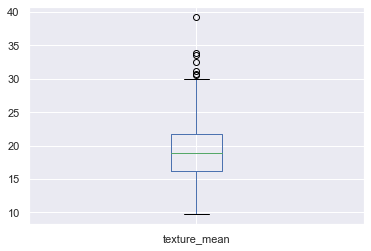

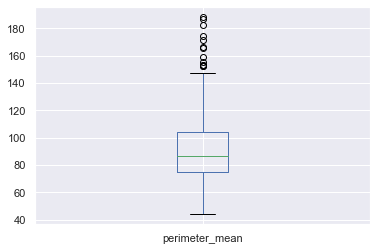

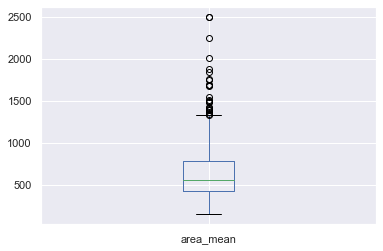

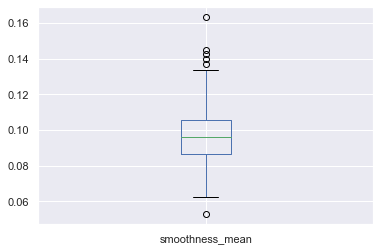

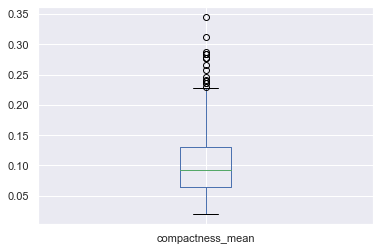

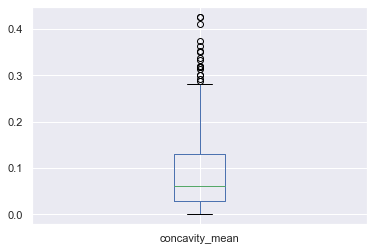

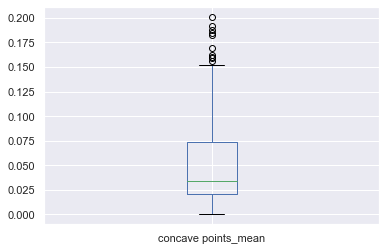

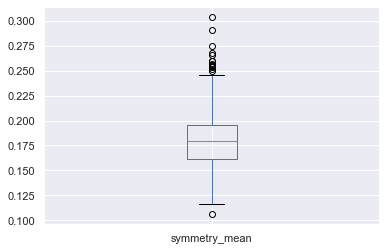

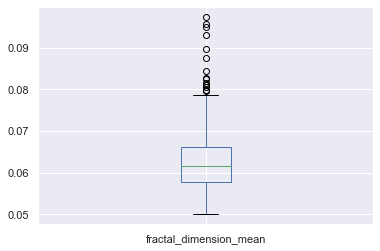

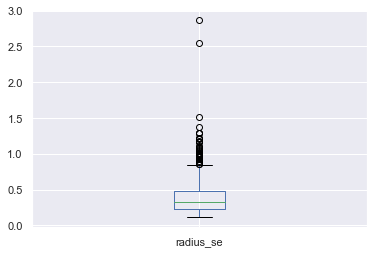

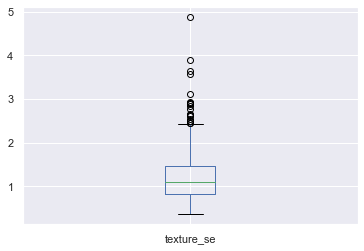

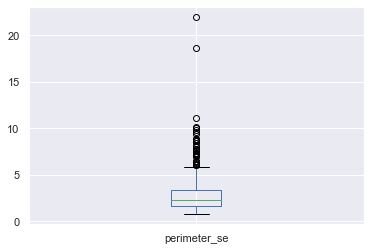

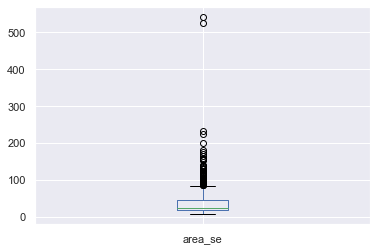

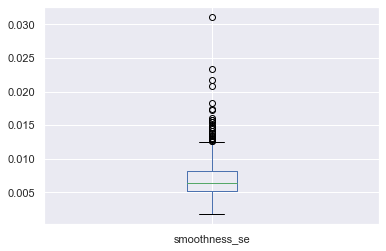

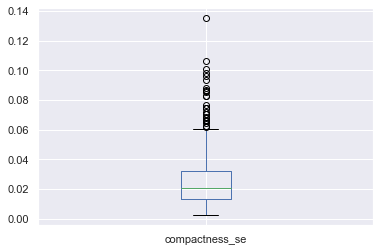

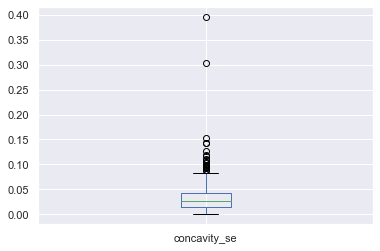

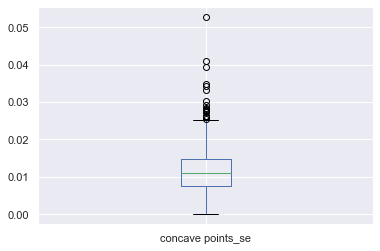

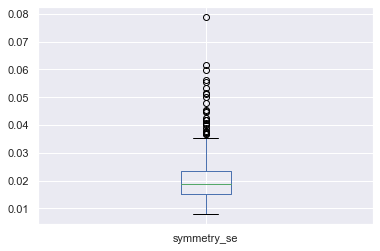

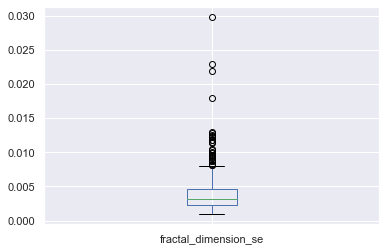

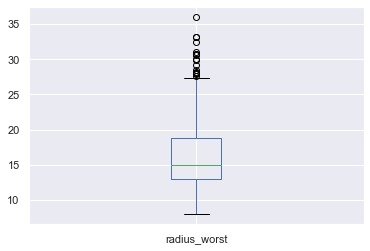

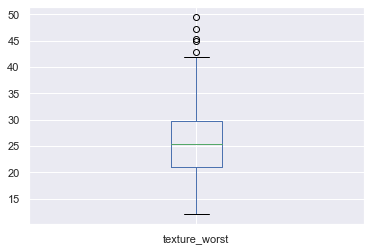

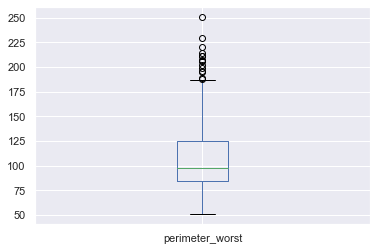

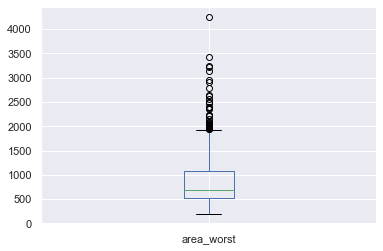

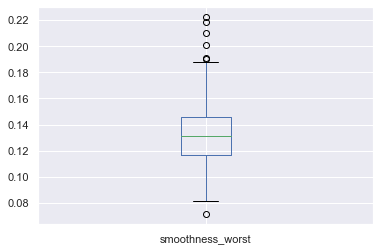

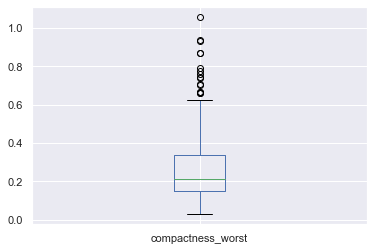

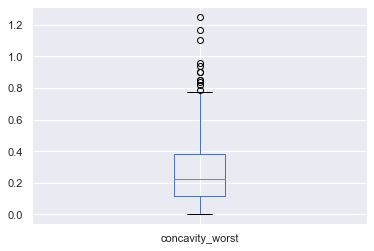

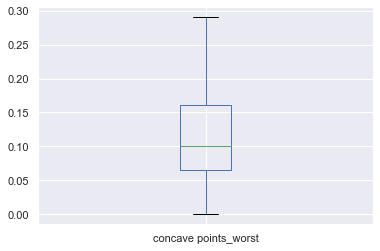

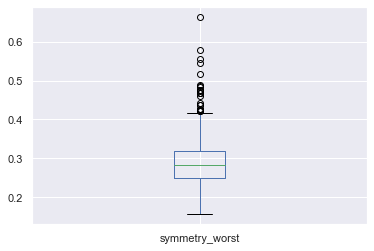

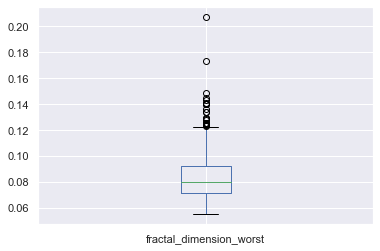

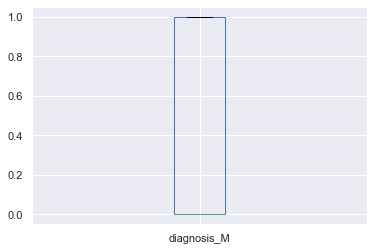

In [31]:
for column in one_hot_df:
    plt.figure()
    one_hot_df.boxplot([column])

In [14]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0, random_state = 2)
model.fit(one_hot_df)

one_hot_df['anomaly']=model.predict(one_hot_df)


anom_count = len(one_hot_df[one_hot_df['anomaly'] == -1])
print('The number of outliers is ' + str(anom_count))

The number of outliers is 57


From the exploration of the outliers of the data, whilst there are some points classed as outliers, from the visualisation none of these are so far away from the majority of the data so as to be clearly identifiable as erroneous: all data will be kept.

In [15]:
#Dropping the anomaly column
one_hot_df = one_hot_df.drop(['anomaly'], axis=1)

#### Visualising some of the mean values:

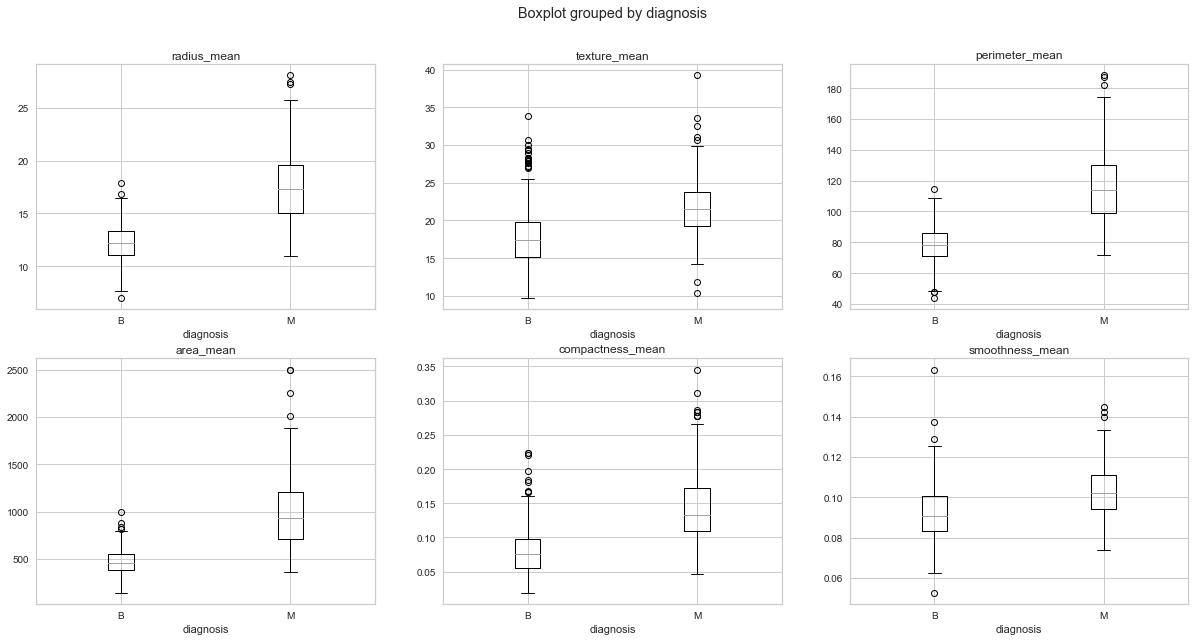

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
df_clean.boxplot('radius_mean','diagnosis', ax=axs[0, 0], patch_artist=False)
df_clean.boxplot('texture_mean','diagnosis', ax=axs[0, 1])
df_clean.boxplot('perimeter_mean','diagnosis', ax=axs[0, 2])
df_clean.boxplot('area_mean','diagnosis', ax=axs[1, 0])
df_clean.boxplot('compactness_mean','diagnosis', ax=axs[1, 1])
df_clean.boxplot('smoothness_mean','diagnosis', ax=axs[1, 2])

### Summary:
* There are a few variables which have have a number of outlier points.
* The proportion of outliers shouldn't have a great effect on the mean, so data will not require further cleaning.
* By comparing the different attributes' boxplots against one another, we can see that the median values for Malignant cases are much higher than the same attributes in Benign cases, this suggests that we should be able to distinguish between the 2 cases quite easily.

## 3. Data Visualisation

We will be using the visualisation of the data in order to observe which features are most helpful for us to use in order to predict whether the cancer is benign or malignant. 

We will also be using it to see if we can pick out trends that can help us select an appropriate model as well as select our hyperparameters.

### 3.1 Graph Types
**Histogram:**
A histogram represents the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable.

**Box Plot:**
The box plot (a.k.a. box and whisker diagram) is a standardized way to display the distribution of data based on the five following summary statistics: minimum, first quartile, median, third quartile, and maximum. It is a very useful plot to very quickly visualise the distribution of a continuous variable across multiple categories.

**Correlation Matrix:**
A correlation matrix is a table showing Pearson correlation coefficients between selected variables. Each cell in the table shows the Pearson correlation between two variables (or more). A clustermap is a correlation matrix to which hierarchical clustering has been applied.

**Scatter Plot:**
A scatterplot helps identify a linear relationship between two variables. A scatterplot can also be called a scattergram or a scatter diagram. It is another way to illustrate correlation between two variables.

### 3.2 Correlations

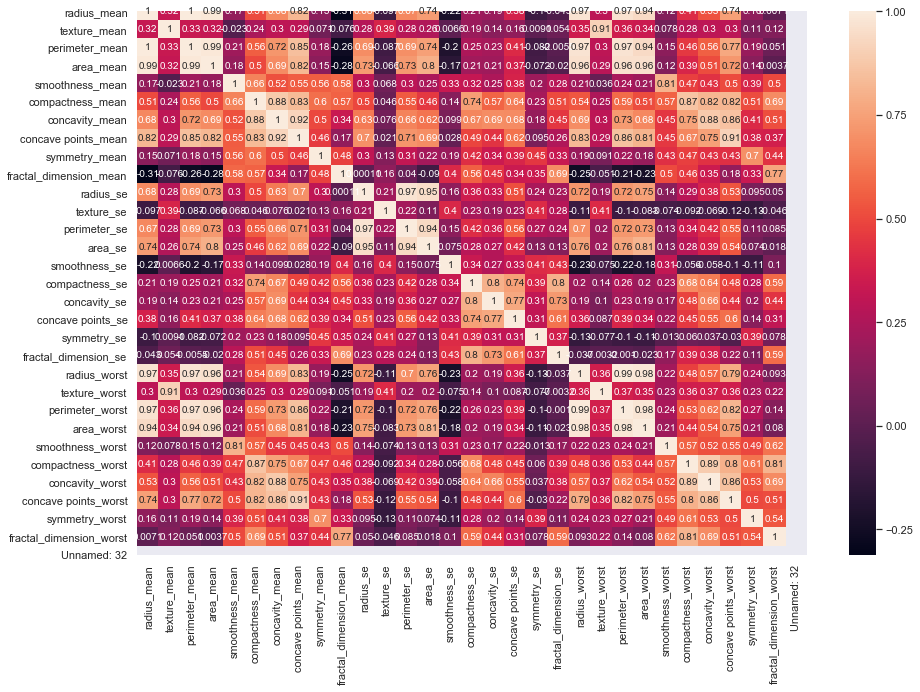

In [39]:
plt.figure(figsize = (15,10))
correlation_matrix = df_raw.corr()
sns.heatmap(data = correlation_matrix, annot = True)

#### We will separate the different variables into mean, SE (standard error) and worst:

In [20]:
features_mean= list(df_clean.columns[1:11])
features_se= list(df_clean.columns[11:20])
features_worst=list(df_clean.columns[21:31])

#### Mean Values:

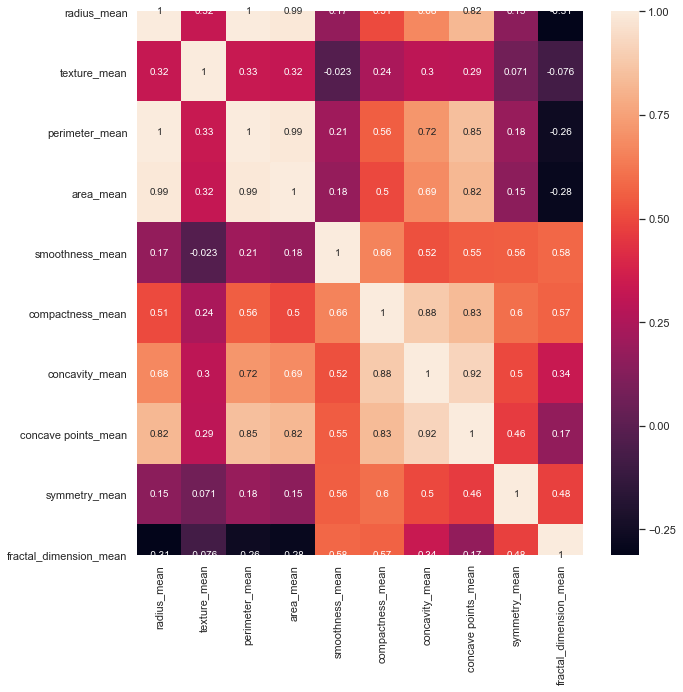

In [22]:
corr = df_clean[features_mean].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

#### Standard Errors:

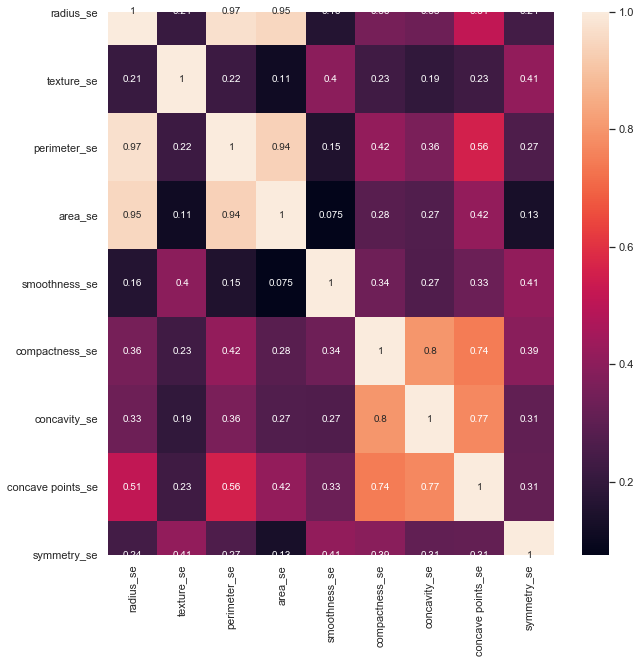

In [25]:
corr = df_clean[features_se].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

#### Worst:

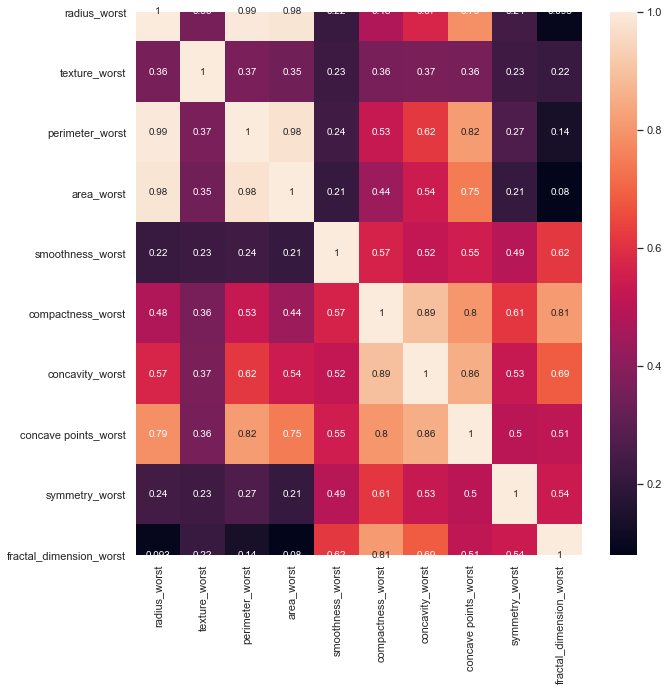

In [24]:
corr = df_clean[features_worst].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

### Summary

Some columns are shown in the correlation visualisation to be highly correlated to each other and so do not add any additional information, and so are redundant. We should eliminate these highly correlated features in order to avoid a predictive bias for the information in these features.

### 3.3 Scatter Plots

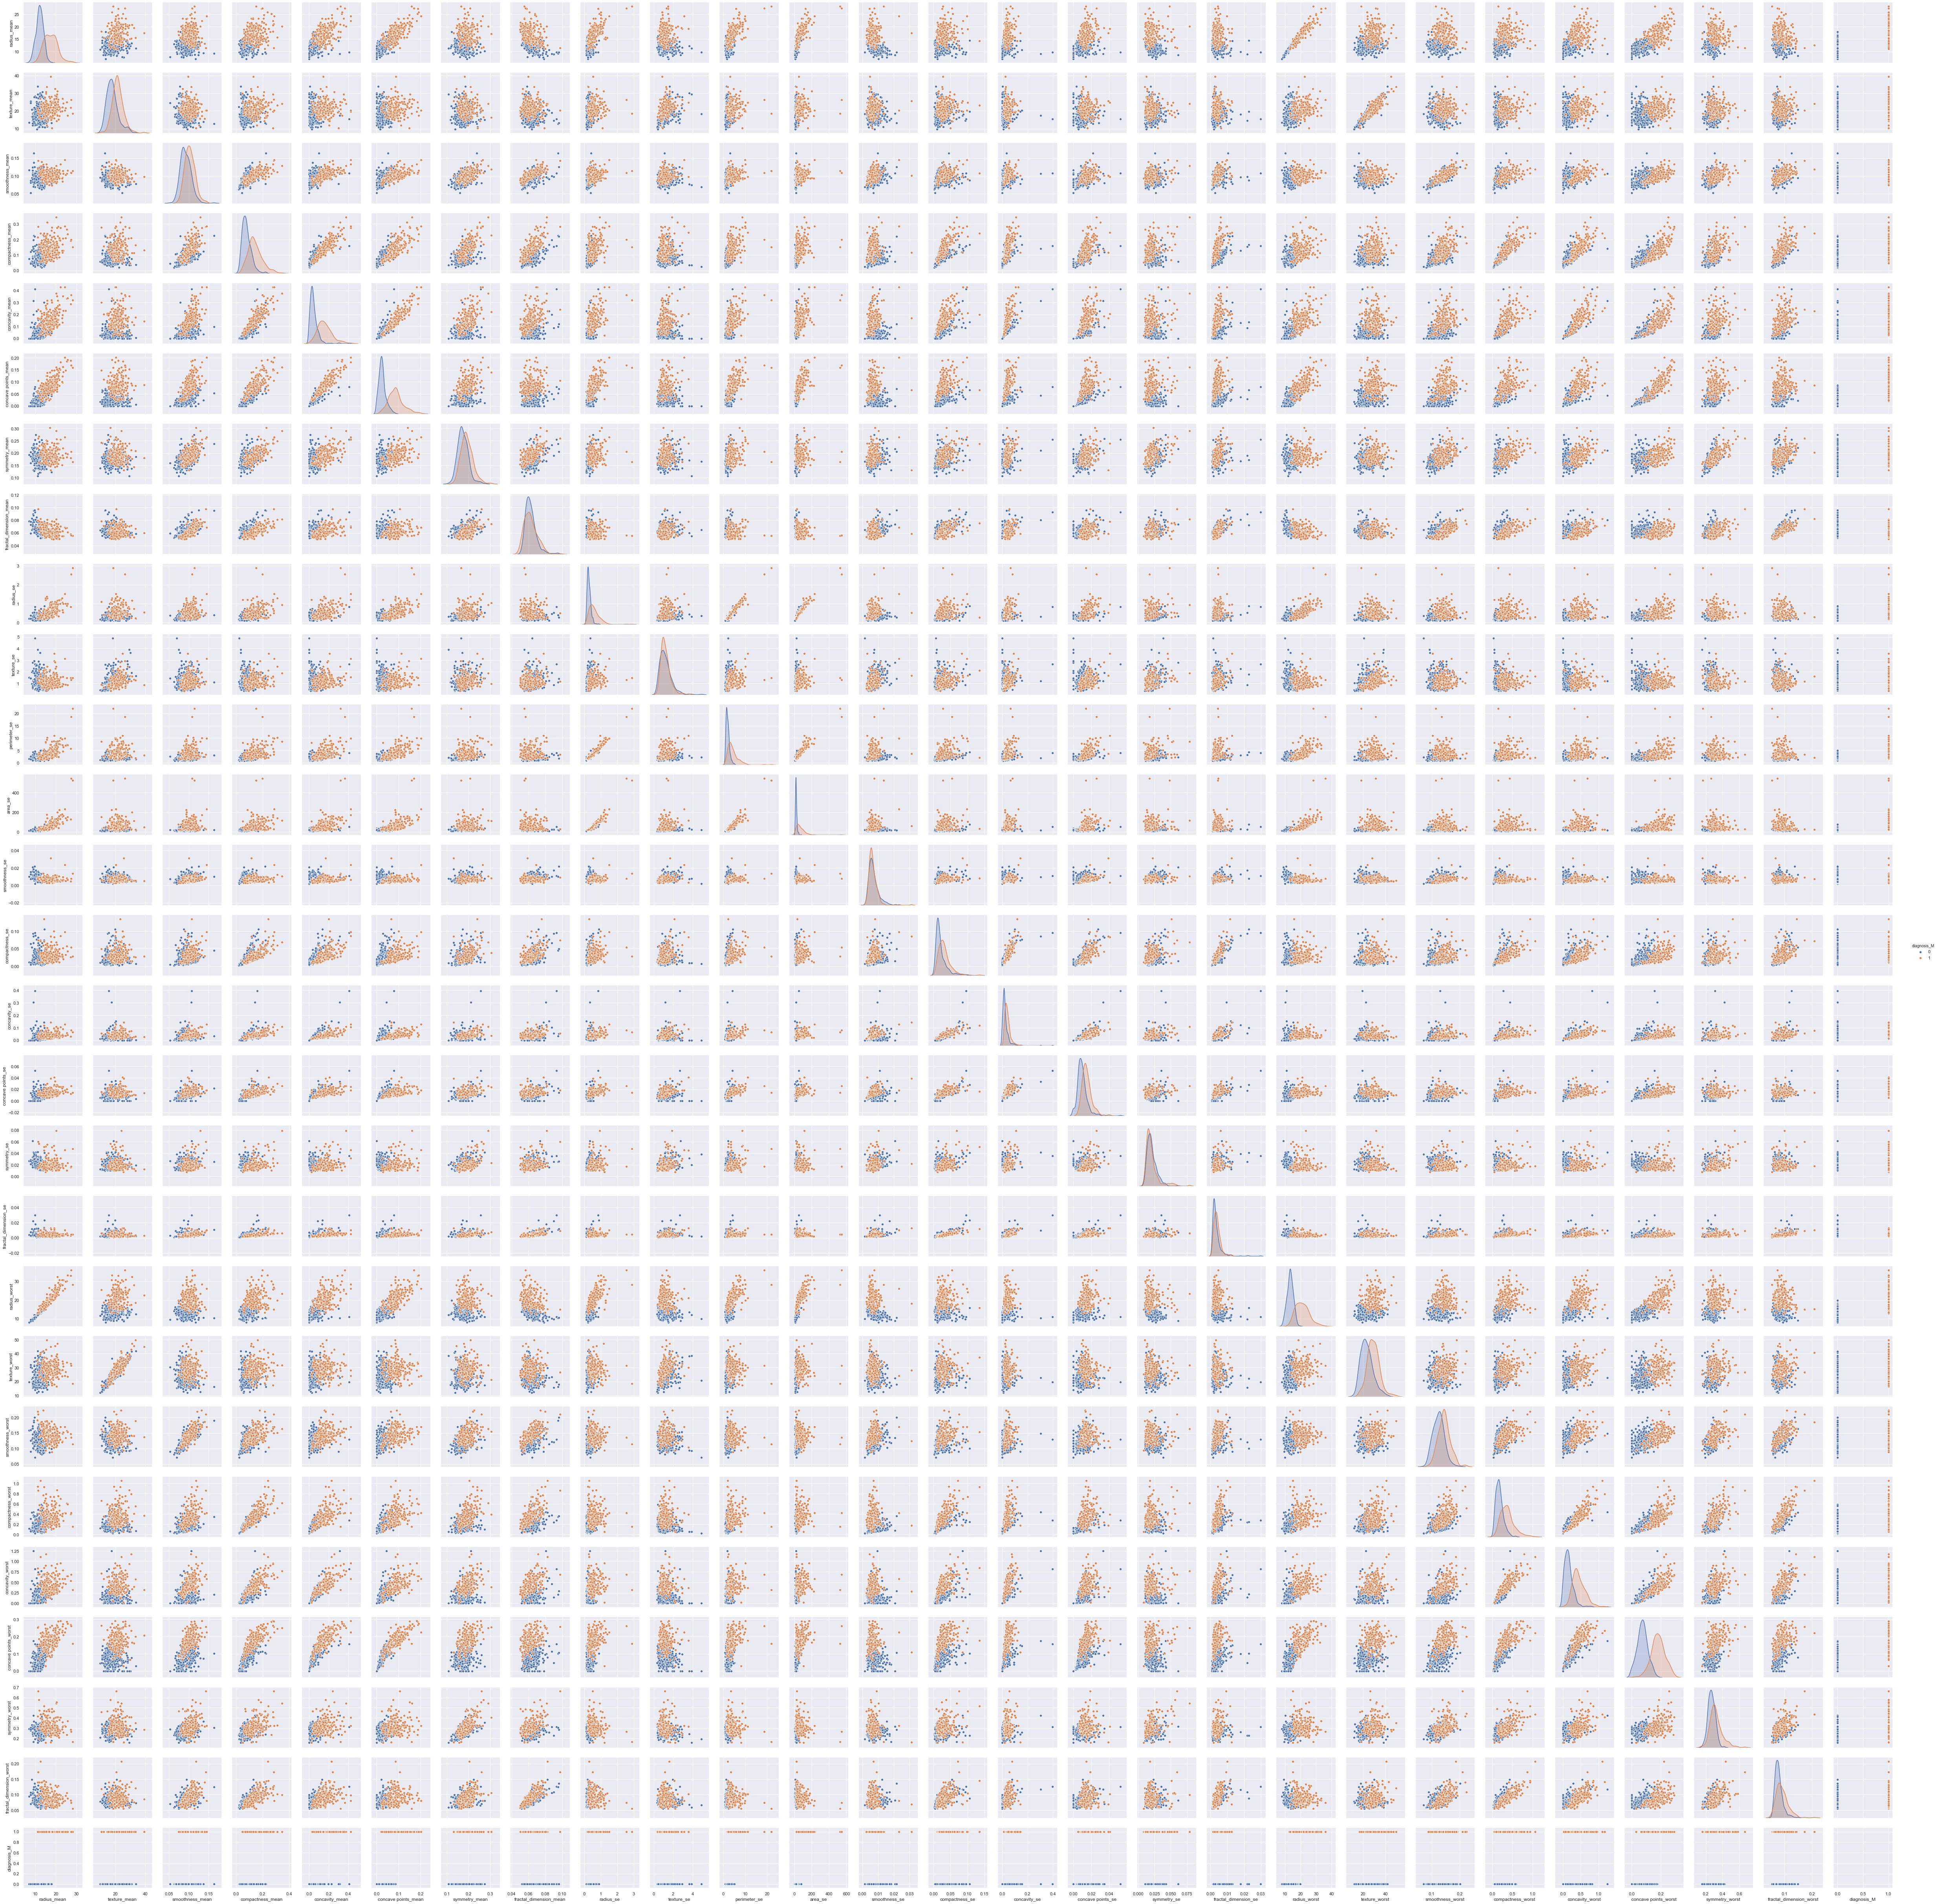

In [38]:
sns.pairplot(one_hot_df, hue = 'diagnosis_M')

A matrix of the visual representation of the relationship between the 5 most highly correlated mean variables: 
1. radius_mean 
2. parameter_mean
3. area_mean 
4. compactness_mean 
5. concavity_mean

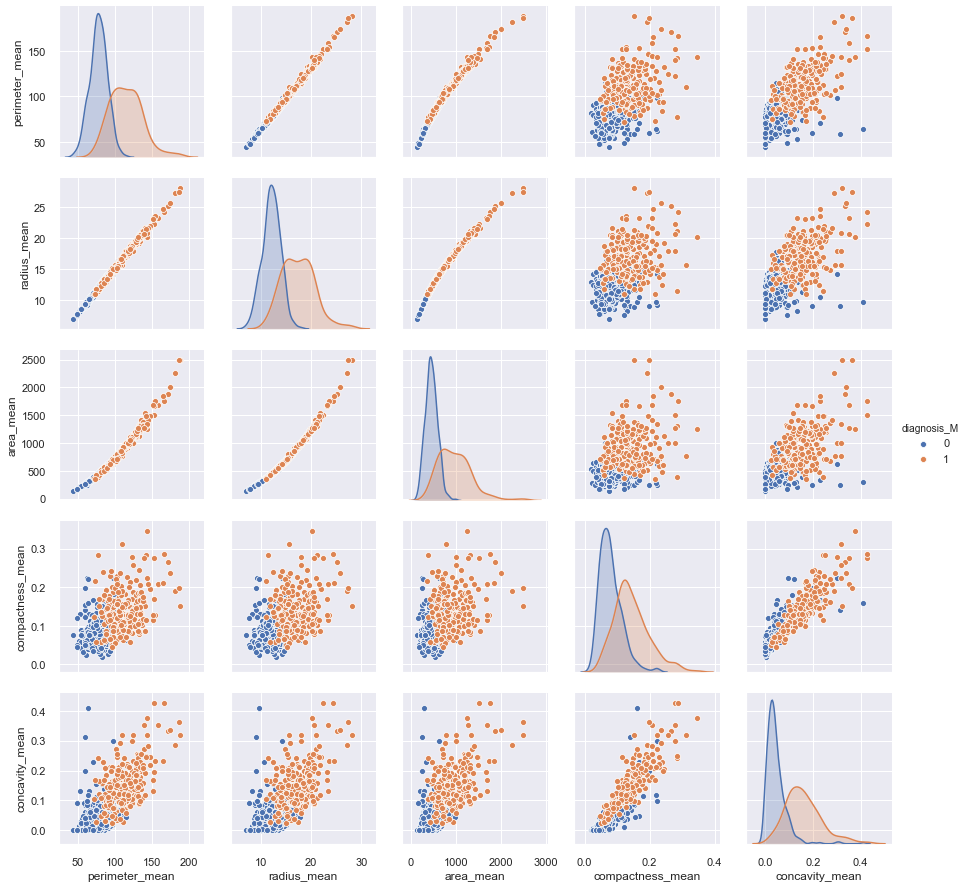

In [69]:
sns.pairplot(one_hot_df, hue='diagnosis_M', vars=["perimeter_mean", "radius_mean", "area_mean", "compactness_mean", "concavity_mean"])

### Observations:
##### Scatter Plots

From the scatter plots above we can see that although there is some overlap it is likely that we will be able to distinguish between the 2 types of diagnosis:

* Malignant cases are in the upper, right quadrant
* Benign cases are in the lower, left quadrant

So the cases with higher values for these variables will most likely be malignant, and vice versa


## 4. Preparing Data for Machine Learning Algorithms

We are going to test several different models and try to optimise them, we will then evaluate them and choose the best model for predicting the tumours. First we need to prepare the data we will use.

### 4.1 Feature Selection
As seen in the heat maps, some columns are  highly correlated to each other and so do not add any additional information, and so are redundant. We should eliminate these highly correlated features in order to avoid a predictive bias for the information in these features, and prevent overfitting:

#### The features can be grouped into: 

1. Size, e.g. perimeter, radius, area 
2. Shape, e.g. compactness, concavity 

The features within these groups also happen to be highly correlated
* There are many highly correlated features among the mean values. 
* There are also some highly negatively correlated features (particularly fractal_dimension_mean with radius_mean, perimeter_mean and area_mean).
 - Looking up fractal dimension it seems that fractal dimension is used to assess the degree of abnormality and aggressiveness of breast cancer.
* We will drop **perimeter_mean** and **area_mean** (0.99 and 1 correlation metrics) and keep ***radius_mean***
* We will drop **perimeter_worst** and **area_worst** (0.98 and 0.99 correlation metrics) and keep ***radius_worst***


In [19]:
##radius_mean is highly correlated to perimeter_mean and area_mean (0.99 and 1 correlation metrics) - keep radius_mean
one_hot_df = one_hot_df.drop(['perimeter_mean'], axis = 1)
one_hot_df = one_hot_df.drop(['area_mean'], axis = 1)

##radius_se is highly correlated to perimeter_se and area_se - keep radius_se
one_hot_df = one_hot_df.drop(['perimeter_se'], axis = 1)
one_hot_df = one_hot_df.drop(['area_se'], axis = 1)

##radius_worst is highly correlated to perimeter_worst & area_worst (0.98 and 0.99 correlation metrics) - keep radius_worst
one_hot_df = one_hot_df.drop(['perimeter_worst'], axis = 1)
one_hot_df = one_hot_df.drop(['area_worst'], axis = 1)

### 4.2 Feature Scaling

We scale our features in order to prevent models from ignoring smaller values in favour of larger ones.

Consequently, all features will have a mean of 0 and a standard deviation of 1.

We are performing a Z-score standardisation as with further research many of the features follow a Gaussian distribution (which will help with the modelling later on as many assume Gaussian distribution). [(Link)](https://docs.google.com/document/d/1x0A1nUz1WWtMCZb5oVzF0SVMY7a_58KQulqQVT8LaVA/edit)

In [20]:
# Initialising the target and features
target = one_hot_df['diagnosis_M']
one_hot_df_in = one_hot_df.drop('diagnosis_M', axis=1)

# Scaling the features
std_features = (one_hot_df_in.apply(lambda x : (x - np.mean(x)) / np.std(x)))
std_features.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
id                                                                       
842302       1.097064     -2.073335         1.568466          3.283515   
842517       1.829821     -0.353632        -0.826962         -0.487072   
84300903     1.579888      0.456187         0.942210          1.052926   
84348301    -0.768909      0.253732         3.283553          3.402909   
84358402     1.750297     -1.151816         0.280372          0.539340   

          concavity_mean  concave points_mean  symmetry_mean  \
id                                                             
842302          2.652874             2.532475       2.217515   
842517         -0.023846             0.548144       0.001392   
84300903        1.363478             2.037231       0.939685   
84348301        1.915897             1.451707       2.867383   
84358402        1.371011             1.428493      -0.009560   

          fractal_dimension_mean  radius_se  texture_se  ...  symmetry_se  \
id                                                       ...                
842302                  2.255747   2.489734   -0.565265  ...     1.148757   
842517                 -0.868652   0.499255   -0.876244  ...    -0.805450   
84300903               -0.398008   1.228676   -0.780083  ...     0.237036   
84348301                4.910919   0.326373   -0.110409  ...     4.732680   
84358402               -0.562450   1.270543   -0.790244  ...    -0.361092   

          fractal_dimension_se  radius_worst  texture_worst  smoothness_worst  \
id                                                                              
842302                0.907083      1.886690      -1.359293          1.307686   
842517               -0.099444      1.805927      -0.369203         -0.375612   
84300903              0.293559      1.511870      -0.023974          0.527407   
84348301              2.047511     -0.281464       0.133984          3.394275   
84358402              0.499328      1.298575      -1.466770          0.220556   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302             2.616665         2.109526              2.296076   
842517            -0.430444        -0.146749              1.087084   
84300903           1.082932         0.854974              1.955000   
84348301           3.893397         1.989588              2.175786   
84358402          -0.313395         0.613179              0.729259   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302          2.750622                 1.937015  
842517         -0.243890                 0.281190  
84300903        1.152255                 0.201391  
84348301        6.046041                 4.935010  
84358402       -0.868353                -0.397100  

[5 rows x 24 columns]

### 4.3 Splitting Data into  'Training' and 'Testing' Groups and Determining the Threshold

Data will be split to maximise the amount of data the model can be trained on; there is suffient data (569 rows) so that the proportion of test data does not need to be larger than 20%. 

There is some skew to the data as identified above but this is not significant enough to warrant artifical creation of further malignant training data.

The threshold is incredibly important when trying to predict a medical diagnosis:
* Our machine learning models will determine whether a tumour is benign or malignant.
* The threshold determines the probability at which we diagnose a tumour as malignant.
* False positives can be tolerated more than false negatives. However false positives should be brought to a minimum as much as possible as a false positive can lead to a patient having to undergo an unnecessary and intrusive biopsy.
* So to balance these risk factors, we have chosen the threshold to be 45%, so as to reduce the probability of a false negative, but not to the extent that there are too many false positives.

In [21]:
# Splitting into training and testing data
X = one_hot_df_in.values
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 42)

# Setting the threshold
threshold = 0.45

# 5. Machine Learning Models
### What is a classifier?
A machine learning model that is used to discriminate different objects based on certain features.


### Accuracy v Precision:
* When it comes time to evaluate these models we have to take into consideration their accuracy and precision

### Optimisation:
Different types of optimisation in Machine Learning [(Link)](https://machinelearningmastery.com/what-is-bayesian-optimization/):
1. **Algorithm Training**. Optimization of model parameters.
2. **Algorithm Tuning**. Optimization of model hyperparameters.
3. **Predictive Modeling**. Optimization of data, data preparation, and algorithm selection.

### Finding and Optimising our Hyperparameters

* Hyperparameters are parameters whose value is set before the ML process begins. 
* They are characteristics of a model that are external to the model and whose value cannot be estimated from data.
* The value of the hyperparameter has to be set before the learning process begins. For example, c in Support Vector Machines, k in k-Nearest Neighbors, the number of hidden layers in Neural Networks [(Link)](https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e).
* In contrast, a parameter is an internal characteristic of the model and its value can be estimated from data (derived via training). Example, beta coefficients of linear/logistic regression or support vectors in Support Vector Machines.
* Different model training algorithms require different hyperparameters [(Link)](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)).
* Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

## 5.1 Logistic Regression

In [22]:
# Function to display the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

In [23]:
# Function to display the Feature Importance 

def plot_feature_importance(clf, colour, classifier_name): #clf = classifier, colour = colours of bars, classifier_name = graph title
    
    features_log = pd.DataFrame(clf.feature_importances_, index = one_hot_df_in.columns.tolist(), 
                            columns = ['Importance'])
    features_log = features_log.sort_values(by='Importance', ascending=True)

    features_log.plot(kind='barh', figsize=(12,9), color = colour)
    plt.xlabel('Feature importance')
    plt.title('Feature importance for {}'.format(classifier_name))
    
    return None

### Baseline Accuracy:
Before building a classification model, let’s build a Dummy Classifier to determine the ‘baseline’ performance. This answers the question — ‘What would be the success rate of the model, if one were simply guessing?’ 

In [24]:
#Dummy Classifier
clf_dummy = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf_dummy.predict(X_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    71
1    43
Name: diagnosis_M, dtype: int64
y predicted : 
0    114
dtype: int64


From the output, we can observe that there are 43 malignant and 71 benign cases in the test dataset. However, our classifier predicts all cases as benign (as it is the majority class).

#### Model Evaluation:

Accuracy Score : 0.6228070175438597
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion matrix, without normalization
[[71  0]
 [43  0]]
Normalized confusion matrix
[[100.   0.]
 [100.   0.]]


<Figure size 576x396 with 0 Axes>

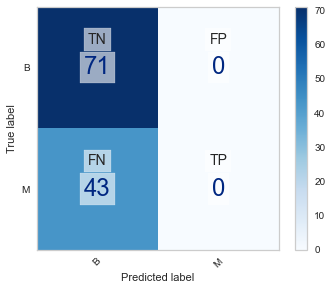

<Figure size 576x396 with 0 Axes>

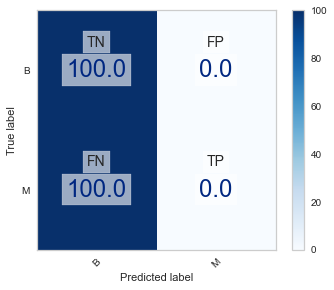

<Figure size 576x396 with 0 Axes>

In [25]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Confusion Matrix Diagram
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the Dummy Classifier
dummy_cfn = confusion_matrix(y_test, y_pred)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(y_test, y_pred).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dummy_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(dummy_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

#### Now that we have the baseline accuracy (62.7%), we can build a Logistic Regression model with default parameters 

### Default Model Fitting:

With help from [(Link)](https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e)

Accuracy: 0.956140350877193
Precision: 0.975
Recall: 0.9069767441860465
F1 Score : 0.9397590361445783
Confusion matrix, without normalization
[[70  1]
 [ 4 39]]
Normalized confusion matrix
[[98.5915493   1.4084507 ]
 [ 9.30232558 90.69767442]]


<Figure size 576x396 with 0 Axes>

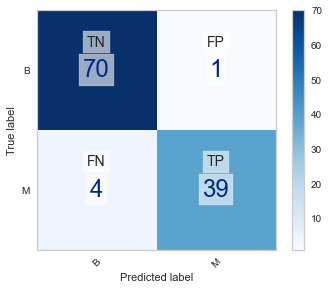

<Figure size 576x396 with 0 Axes>

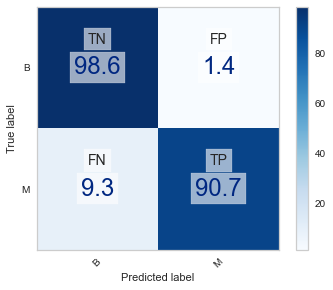

<Figure size 576x396 with 0 Axes>

In [26]:
logistic_regressor = LogisticRegression()
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test) #can specify a solver (default is lbfgs)

#Model Evaluation Metrics
print('Accuracy: ' + str(accuracy_score(y_test,y_pred)))
print('Precision: ' + str(precision_score(y_test,y_pred)))
print('Recall: ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Confusion Matrix Diagram
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the Dummy Classifier
default_cfn = confusion_matrix(y_test, y_pred)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(y_test, y_pred).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(default_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(default_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

### Observations:
When we fit the model with the default parameters, we get a more accurate and precise model:
* Accuracy = 95.6%
* Precision = 97.5%

When we look at the cases that have been misclassified:
* 3 malignant cases have been classified as benign (false negatives)
* 1 benign case has been classified as malignant (false positive)

We need to reduce the number of false negatives significantly, as this type of misdiagnosis could lead to the patient dying due to lack of treatment. We should also be looking to reduce the false positive as this will lead to unnecessary surgery.

By using **Grid Search** to find the *optimal* parameters we should be able to minimise the false negatives significantly. 

### Grid Search

From [(Link)](https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e): The metric we need to focus on in order to reduce false negatives is **Recall** (we need to maximise its value).


Accuracy Score : 0.956140350877193
Precision Score : 0.975
Recall Score : 0.9069767441860465
F1 Score : 0.9397590361445783
Confusion matrix, without normalization
[[70  1]
 [ 4 39]]
Normalized confusion matrix
[[98.5915493   1.4084507 ]
 [ 9.30232558 90.69767442]]


<Figure size 576x396 with 0 Axes>

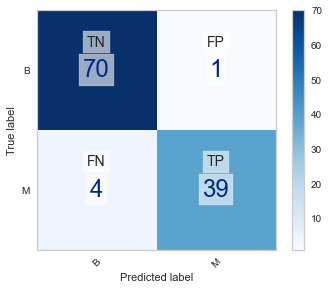

<Figure size 576x396 with 0 Axes>

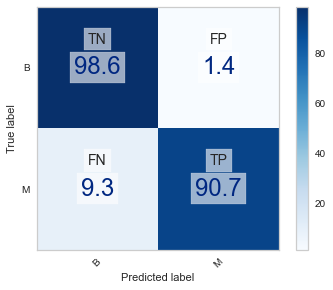

<Figure size 576x396 with 0 Axes>

In [27]:
#Grid Search
clf_grid_search = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
grid_result = grid_clf_acc.fit(X_train, y_train)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Confusion Matrix Diagram
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the Dummy Classifier
grid_cfn = confusion_matrix(y_test, y_pred_acc)
log_tn, log_fp, log_fn, log_tp = confusion_matrix(y_test, y_pred_acc).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(grid_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(grid_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

Now the accuracy and precision scores have increased:
* Accuracy = 98.2%
* Precision = 97.6%

##### The hyperparameters we tuned are:
1. Penalty: l1 or l2 which species the norm used in the penalization.
2. C: Inverse of regularization strength- smaller values of C specify stronger regularization.

We can further tune the model to strike a balance between precision and recall by using ‘f1’ score as the evaluation metric. 

A more efficient technique for hyperparameter tuning is the Randomized search — where random combinations of the hyperparameters are used to find the best solution.

### Evaluating Model:
Just like for a regression problem, a classification can be assessed with specific metrics. The main one is the **ROC curve** and the **AUC - Area Under the Curve**. The closest to 1 is your AUC, the better is your classification model. You will have a specific session on this topic, but in the meantime, you can find more details about what a ROC curve is [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) and on [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).


In [108]:
# Initiating model with newly tuned parameters:
lr_params = grid_result.best_params_
lr_params

tuned_lr = LogisticRegression(random_state = 42, C=lr_params['C'], class_weight={1: 0.4, 0: 0.6}, penalty=lr_params['penalty'], solver='liblinear')
clf_lr = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
clf_lr.fit(X_train, y_train)

# Fit your logistic regression model to your train model
tuned_lr.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_model = tuned_lr.predict(X_test)

model_result = tuned_lr.fit(X_train, y_train)


                                 ROC Curve


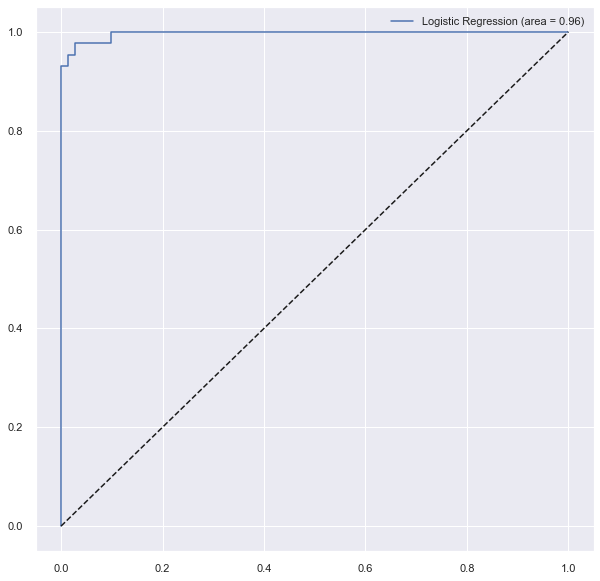

AUC : 0.9580740255486406


In [122]:
# Prediction Labels and Probabilities on your Test Set of Independent Variables
pred_lr = tuned_lr.predict(X_test)
proba_lr = tuned_lr.predict_proba(X_test)

#ROC Curve
auc = roc_auc_score(y_test, y_pred)
print("                                 ROC Curve")
fpr, tpr, thresholds = roc_curve(y_test, proba_logit[:,1], pos_label=1)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc="best")
plt.show()
print("AUC : " + str(auc))

## 5.2 Decision Trees

Accuracy: 0.9385964912280702
Precision: 0.9285714285714286
Recall: 0.9069767441860465
F1 Score : 0.9176470588235294
Confusion matrix, without normalization
[[68  3]
 [ 4 39]]
Normalized confusion matrix
[[95.77464789  4.22535211]
 [ 9.30232558 90.69767442]]


<Figure size 432x288 with 0 Axes>

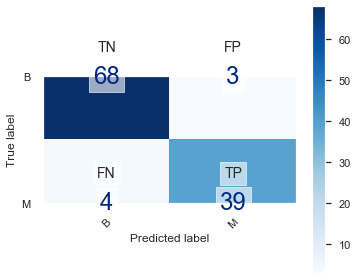

<Figure size 432x288 with 0 Axes>

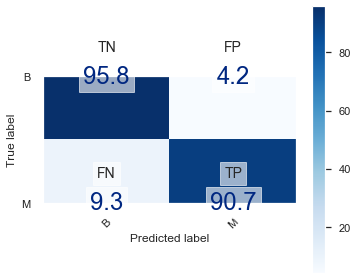

<Figure size 432x288 with 0 Axes>

In [167]:
dtc = DecisionTreeClassifier()
dec = dtc.fit(X_train, y_train)
y_pred = dec.predict(X_test) 


#Model Evaluation Metrics
print('Accuracy: ' + str(accuracy_score(y_test,y_pred)))
print('Precision: ' + str(precision_score(y_test,y_pred)))
print('Recall: ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Confusion Matrix Diagram
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the Dummy Classifier
default_cfn = confusion_matrix(y_test, y_pred)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(y_test, y_pred).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(default_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(default_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

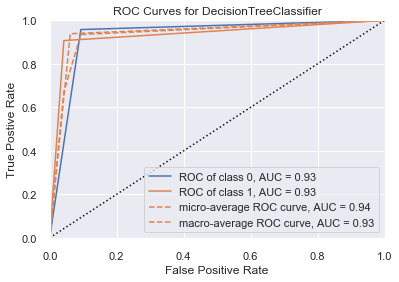

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a5a16a750>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

In [186]:
#ROC/AUC Curve
model = DecisionTreeClassifier()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test)

## 5.3 Random Forest

Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score : 0.9411764705882352
Confusion matrix, without normalization
[[69  2]
 [ 3 40]]
Normalized confusion matrix
[[97.18309859  2.81690141]
 [ 6.97674419 93.02325581]]


<Figure size 576x396 with 0 Axes>

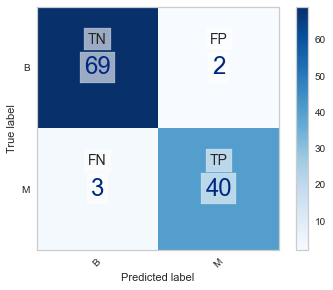

<Figure size 576x396 with 0 Axes>

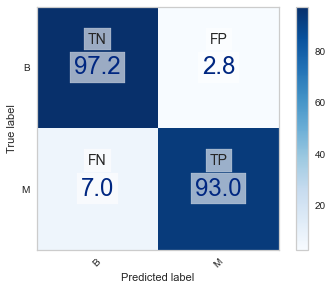

<Figure size 576x396 with 0 Axes>

In [28]:
random_forest_class= RandomForestClassifier(100)
rfc = random_forest_class.fit(X_train, y_train.ravel())
y_pred = rfc.predict(X_test) 


#Model Evaluation Metrics
print('Accuracy: ' + str(accuracy_score(y_test,y_pred)))
print('Precision: ' + str(precision_score(y_test,y_pred)))
print('Recall: ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Confusion Matrix Diagram
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the Dummy Classifier
default_cfn = confusion_matrix(y_test, y_pred)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(y_test, y_pred).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(default_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(default_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

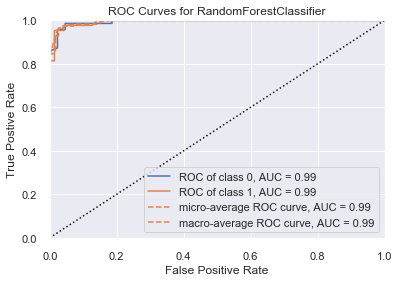

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a5a0f7510>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

In [187]:
# ROC Curve
model = RandomForestClassifier(100)
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test)

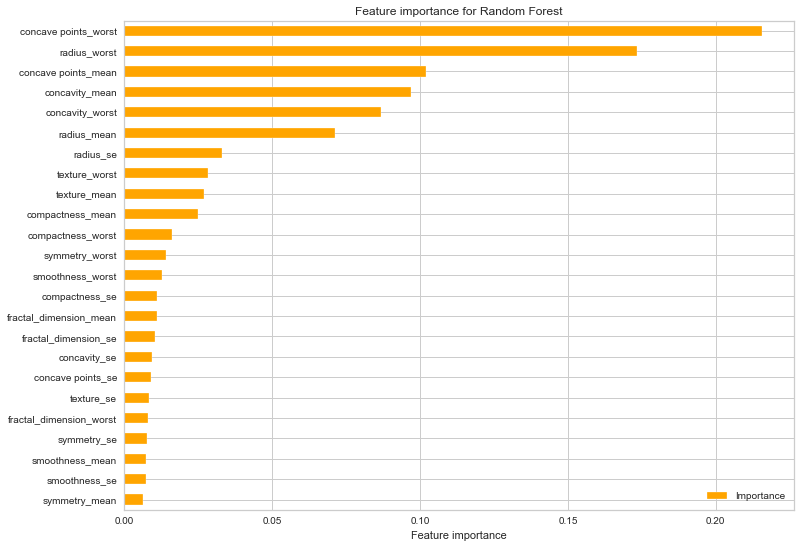

In [29]:
#Feature Importance:
plot_feature_importance(random_forest_class,"orange","Random Forest")
plt.show()

## 5.4 Nearest Neighbour

In [152]:
# Creating odd list K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())

### Optimising the Nearest Neighbour Model

In [153]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 29


#### Integrating the Optimised Number of Neighbours:

In [173]:
from sklearn.neighbors import KNeighborsClassifier
nnclassifier = KNeighborsClassifier(n_neighbors=29)
nnclassifier.fit(X_train, y_train)

pred_clf_nn = nnclassifier.predict(X_test)
proba_clf_nn = nnclassifier.predict_proba(X_test)

#Threshold for prediction set at 50%
thres = 0.45
target_predict_nn = np.where(proba_clf_nn[:,1] > thres, 1, 0)
target_actual = y_test

Confusion matrix, without normalization
[[67  4]
 [ 5 38]]
Normalized confusion matrix
[[94.36619718  5.63380282]
 [11.62790698 88.37209302]]


<Figure size 432x288 with 0 Axes>

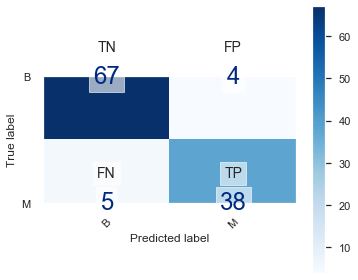

<Figure size 432x288 with 0 Axes>

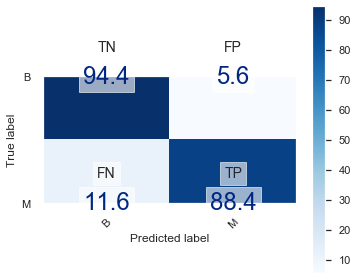

<Figure size 432x288 with 0 Axes>

In [174]:
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
nn_cfn = confusion_matrix(target_actual, target_predict_nn)
nn_tn, nn_fn, nn_fp, nn_tp = confusion_matrix(target_actual, target_predict_nn).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(nn_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(nn_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [156]:
nn_acc = round((nn_tp + nn_tn) / X_test.shape[0], 3) * 100
nn_precision = round((nn_tp / (nn_tp + nn_fp)), 2) * 100

print('Nearest Neighbour Accuracy: {:.2f}%'.format(nn_acc))
print('Nearest Neighbour Precision: {:.2f}%'.format(nn_precision))

Nearest Neighbour Accuracy: 93.00%
Nearest Neighbour Precision: 88.00%


In [157]:
from sklearn.metrics import accuracy_score
print("Accuracy:{}".format(accuracy_score(y_test,pred_clf_nn)))

Accuracy:0.9298245614035088


## 5.5 Support Vector Machines

In [158]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [159]:
pred_clf_sv = svclassifier.predict(X_test)

Confusion matrix, without normalization
[[70  1]
 [ 4 39]]
Normalized confusion matrix
[[98.5915493   1.4084507 ]
 [ 9.30232558 90.69767442]]


<Figure size 432x288 with 0 Axes>

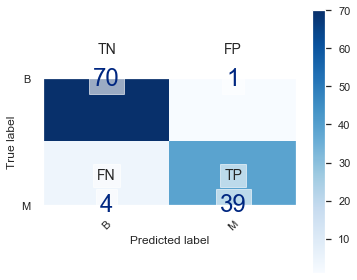

<Figure size 432x288 with 0 Axes>

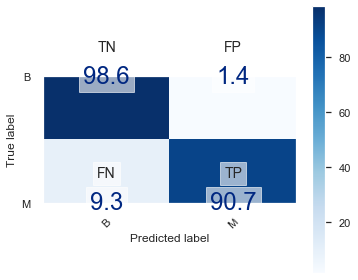

<Figure size 432x288 with 0 Axes>

In [160]:
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
sv_cfn = confusion_matrix(target_actual, pred_clf_sv)
sv_tn, sv_fn, sv_fp, sv_tp = confusion_matrix(target_actual, pred_clf_sv).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(sv_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(sv_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [161]:
sv_acc = round((sv_tp + sv_tn) / X_test.shape[0], 3) * 100
sv_precision = round((sv_tp / (sv_tp + sv_fp)), 2) * 100

print('Support Vector Machines: {:.2f}%'.format(sv_acc))
print('Support Vector Machines: {:.2f}%'.format(sv_precision))

Support Vector Machines: 95.60%
Support Vector Machines: 91.00%


## 5.6 Kernel SVM

Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1 Score : 0.9302325581395349
Confusion matrix, without normalization
[[68  3]
 [ 3 40]]
Normalized confusion matrix
[[95.77464789  4.22535211]
 [ 6.97674419 93.02325581]]


<Figure size 432x288 with 0 Axes>

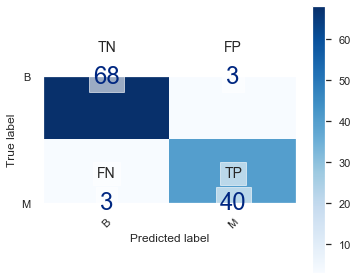

<Figure size 432x288 with 0 Axes>

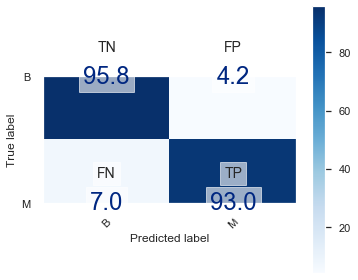

<Figure size 432x288 with 0 Axes>

In [133]:
#Using SVC method of svm class to use Kernel SVM Algorithm
kernel_classifier = SVC(kernel = 'rbf', random_state = 0)
clf_kernel = kernel_classifier.fit(X_train, y_train)
y_pred = clf_kernel.predict(X_test)

#Model Evaluation Metrics
print('Accuracy: ' + str(accuracy_score(y_test,y_pred)))
print('Precision: ' + str(precision_score(y_test,y_pred)))
print('Recall: ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Confusion Matrix Diagram
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the Dummy Classifier
kernel_cfn = confusion_matrix(y_test, y_pred)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(y_test, y_pred).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(kernel_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(kernel_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)
plt.show()
plt.tight_layout()

The Kernel SVM did not perform as well as our Logistic Regression:
* Accuracy = 94.7%
* Precision = 93.0%

#### Improving the model:

From [this link](https://www.researchgate.net/post/Worse_SVM_results_when_standardizing_data_than_without), it seems that I should tweak 'C' in order to see if I get a better performance

## 5.7 Naive Bayes Classifier
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem:

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is **presence of one particular feature does not affect the other**. Hence it is called naive.

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They **require a small amount of training data to estimate the necessary parameters (i.e. not a lot of data is needed in order for it to perform well)**. 

It needs enough data to understand the probabilistic relationship of each attribute in isolation with the output variable.

Given that interactions between attributes are ignored in the model, we do not need examples of these interactions and therefore generally less data than other algorithms, such as logistic regression.

Further, it is less likely to overfit the training data with a smaller sample size.

Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score : 0.9411764705882352
Confusion matrix, without normalization
[[69  2]
 [ 3 40]]
Normalized confusion matrix
[[97.18309859  2.81690141]
 [ 6.97674419 93.02325581]]


<Figure size 432x288 with 0 Axes>

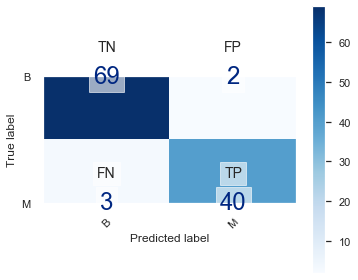

<Figure size 432x288 with 0 Axes>

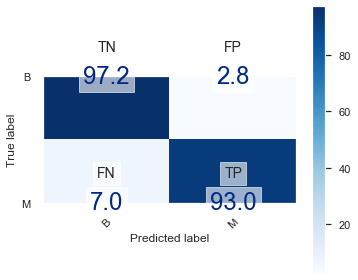

<Figure size 432x288 with 0 Axes>

In [128]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
nb_classifier = GaussianNB()
clf_nb = nb_classifier.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)

#Model Evaluation Metrics
print('Accuracy: ' + str(accuracy_score(y_test,y_pred)))
print('Precision: ' + str(precision_score(y_test,y_pred)))
print('Recall: ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Confusion Matrix Diagram
class_names = ['B', 'M']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the Dummy Classifier
nb_cfn = confusion_matrix(y_test, y_pred)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(y_test, y_pred).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

The Gaussian Naive Bayes did not perform as well as our Logistic Regression:
* Accuracy = 95.6%
* Precision = 95.2%


## 6. Evaluation

In our evaluation we will be determining which model is the best for us to use for predicting whether a tumour is malignant or not. 

Based on the following metrics such as accuracy, precision and based on the confusion matrices presented our best presenting model is the Logistic Regression.



### Improvements:
* Although we decided not to rebalance our training set, this may have hindered our models, as there is a significantly larger number of benign cells in the dataset 
* Although we removed 6 highly correlated features, we could have been more discriminating with the feature selection. For instance from the histograms, we can see quite a bit of overlap between the values of the 2 classes with features like symmetry_se, fractal_dimension_se, smoothness_worst and smoothness_mean which we kept in.
* With more time we would iron out these 
* We decided to go with 45% threshold, however we could have explored more percentage options
* Given the increased risk of an incorrect negative diagnosis where the cells are actually malignant, we could lower the percentage threshold needed for a positive diagnosis (and look to decrease the number of false negatives).
